In [1]:
import sys

In [2]:
sys.version_info

sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)

In [3]:
if sys.platform == 'darwin' :
    print(" Mac OS ")
else :
    print(' Windows ')

 Mac OS 


## 상장기업 정보 가져오기

## 모듈 import 하기

In [4]:
import FinanceDataReader as fdr
fdr.__version__

'0.7.2'

In [5]:
import pandas as pd

In [6]:
import numpy as np

In [7]:
#  차트 설정
%matplotlib inline
import matplotlib.pyplot as plt

#plt.rcParams["font.family"] =  "Malgun Gothic"
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams["axes.grid"] = True

In [8]:
from matplotlib import font_manager, rc
import sys

if sys.platform == 'darwin' :
    rc('font', family='AppleGothic')

    plt.rcParams['axes.unicode_minus'] = False
else :
    
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [9]:
help(fdr.DataReader)

Help on function DataReader in module FinanceDataReader.data:

DataReader(symbol, start=None, end=None, country=None)



# 1. 신라젠, 2017년~현재 종가별 흐름 그래프 그리기

## 특정 년도 이후 

In [10]:
df = fdr.DataReader('215600', '2017')

In [11]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,13250,13250,12900,12950,497396,-0.022642
2017-01-03,13000,13150,12700,12750,540369,-0.015444
2017-01-04,12800,12900,12650,12850,399112,0.007843
2017-01-05,12950,13550,12800,13200,1159516,0.027237
2017-01-06,13250,13250,12950,13050,385308,-0.011364


In [12]:
df.tail()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-05-13,56400,57700,55900,55900,534330,-0.026132
2019-05-14,54300,56200,53600,54800,995092,-0.019678
2019-05-15,55300,56600,54900,56000,541148,0.021898
2019-05-16,56000,57800,55400,55900,558762,-0.001786
2019-05-17,56700,57500,55900,56000,385992,0.001789


### 종가로 그래프 그리기

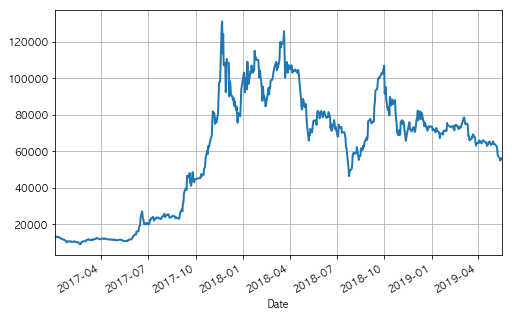

In [13]:
df['Close'].plot(figsize=(8,5))

In [14]:
df['Close'].describe(percentiles=[.1, .9])

count       579.000000
mean      60036.424870
std       32469.177583
min        9050.000000
10%       11540.000000
50%       69000.000000
90%      102920.000000
max      131000.000000
Name: Close, dtype: float64

### 종가에 대한 누적 최대값 처리

In [15]:
df_cummax = df['Close'].cummax()

In [16]:
df_cummax.head()

Date
2017-01-02    12950
2017-01-03    12950
2017-01-04    12950
2017-01-05    13200
2017-01-06    13200
Name: Close, dtype: int64

In [17]:
df_cummax.tail()

Date
2019-05-13    131000
2019-05-14    131000
2019-05-15    131000
2019-05-16    131000
2019-05-17    131000
Name: Close, dtype: int64

#### 최대값과 최소값 구하기

In [18]:
df_cummax.max(), df_cummax.idxmax()

(131000, Timestamp('2017-11-21 00:00:00'))

In [19]:
df_cummax.min(), df_cummax.idxmin()

(12950, Timestamp('2017-01-02 00:00:00'))

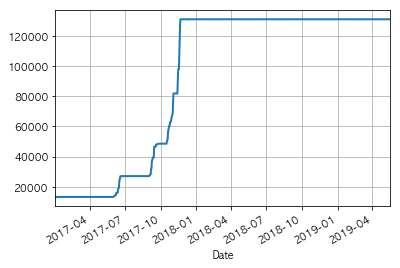

In [20]:

df_cummax.plot()


### 두 개의 그래프를 통합해서 비교하기 

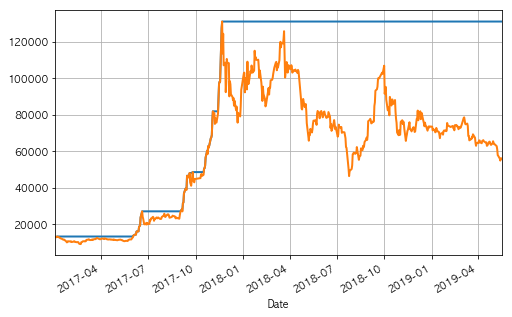

In [21]:
ax1=plt.subplot(1, 1, 1)

df_cummax.plot(ax=ax1)
df['Close'].plot(figsize=(8,5), ax=ax1)

## 2. 셀트리온 헬스케어

In [22]:
df_1 = fdr.DataReader('091990', '2017')

####  사본을 만들어서 처리하기

In [23]:
df_2 = df_1.copy()

In [24]:
np.may_share_memory(df_2, df_1)

False

In [25]:
df_1.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926
2017-08-01,48994,50438,47262,49380,3611026,0.031156
2017-08-02,48898,50246,48127,49091,2495045,-0.005853
2017-08-03,48609,49764,46876,49669,3930618,0.011774


### 종가 기준으로 그래프 그리기

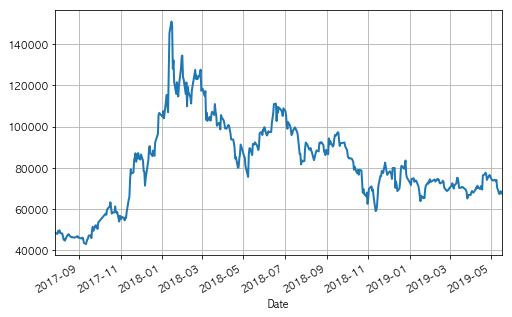

In [26]:
df_1['Close'].plot(figsize=(8,5))

###  최종가 와 누적 맥스값 처리 

In [27]:
df_1_cummax = df_1['Close'].cummax()

In [28]:
df_1_cummax.max(), df_1_cummax.idxmax()

(150908, Timestamp('2018-01-15 00:00:00'))

In [29]:
df_1_cummax.min(), df_1_cummax.idxmin()

(48417, Timestamp('2017-07-28 00:00:00'))

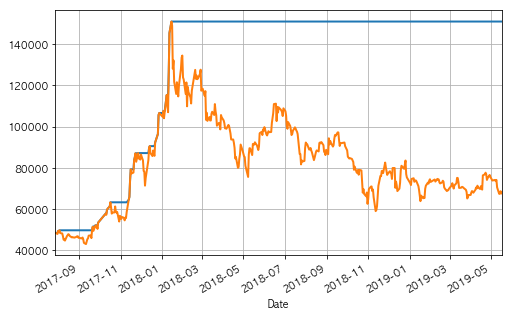

In [30]:
ax2 =plt.subplot(1, 1, 1)

df_1_cummax.plot(ax=ax2)
df_1['Close'].plot(figsize=(8,5), ax=ax2)

### 이동평균 구하기

In [31]:
df_1['20d'] = np.round(df_1["Close"].rolling(window=42).mean(), 2)

In [32]:
df_1.head()

,Open,High,Low,Close,Volume,Change,20d
Date,,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926,NaN
2017-08-01,48994,50438,47262,49380,3611026,0.031156,NaN
2017-08-02,48898,50246,48127,49091,2495045,-0.005853,NaN
2017-08-03,48609,49764,46876,49669,3930618,0.011774,NaN


In [33]:
df_1['60d'] = np.round(df_1["Close"].rolling(window= 60).mean(), 2)

In [34]:
df_1['120d'] = np.round(df_1["Close"].rolling(window=120).mean(), 2)

In [35]:
df_1.head()

,Open,High,Low,Close,Volume,Change,20d,60d,120d
Date,,,,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN,NaN,NaN,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926,NaN,NaN,NaN
2017-08-01,48994,50438,47262,49380,3611026,0.031156,NaN,NaN,NaN
2017-08-02,48898,50246,48127,49091,2495045,-0.005853,NaN,NaN,NaN
2017-08-03,48609,49764,46876,49669,3930618,0.011774,NaN,NaN,NaN


## 추세선에 따른 주식 매수, 보호, 매도

   20일선과 60일선이 120 선가 근접... 위로 올라가면 매수 신호

In [36]:
df_1['20-120'] = df_1['20d'] - df_1['120d']

In [37]:
df_1['20-120'].tail()

Date
2019-05-13   -1275.53
2019-05-14   -1507.84
2019-05-15   -1632.28
2019-05-16   -1653.05
2019-05-17   -1646.98
Name: 20-120, dtype: float64

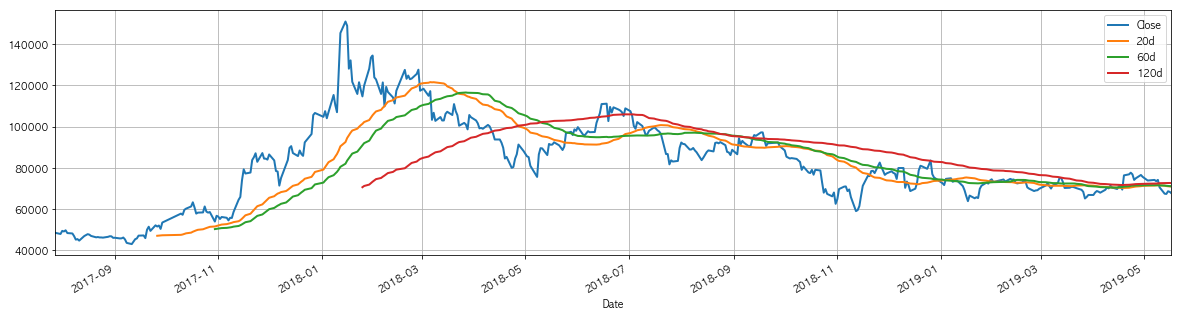

In [38]:
df_1[['Close','20d','60d','120d']].plot(figsize=(20,5))

####  특정 임계값을 지정해서 매매 구간 확정하기

In [39]:
SD = 50

In [40]:
df_1['20-120'].value_counts().head()

-13218.86    1
-4480.89     1
-876.95      1
-4272.24     1
-4253.25     1
Name: 20-120, dtype: int64

#### 삼항연산 where를 이용해서 50 보다 크면  1로 세팅

In [41]:
df_1['매매구간'] = np.where(df_1['20-120']> SD,1,0)

#### 마이너스일 경우 음수로 표시

In [42]:
df_1['매매구간'] = np.where(df_1['20-120'] < -SD, -1, df_1['매매구간'])

In [43]:
df_1['매매구간'].head()

Date
2017-07-28    0
2017-07-31    0
2017-08-01    0
2017-08-02    0
2017-08-03    0
Name: 매매구간, dtype: int64

In [44]:
df_1['매매구간'].tail()

Date
2019-05-13   -1
2019-05-14   -1
2019-05-15   -1
2019-05-16   -1
2019-05-17   -1
Name: 매매구간, dtype: int64

In [45]:
df_1['매매구간'].value_counts()

-1    256
 0    119
 1     63
Name: 매매구간, dtype: int64

### 매매영역 시각화

(-1.1, 1.1)

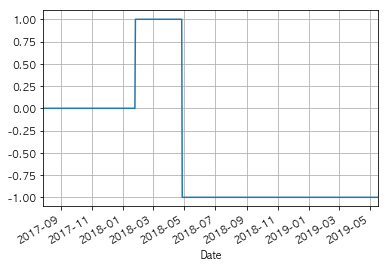

In [46]:
df_1['매매구간'].plot(lw=1.5)
plt.ylim([-1.1, 1.1])

### 종가를 최대값으로 나눠서 매매구간에 대한 처리 

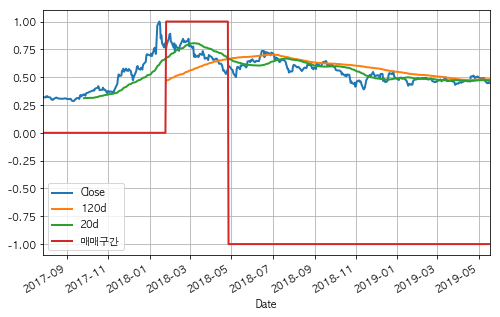

In [47]:
ax3 =plt.subplot(1, 1, 1)

(df_1['Close']/df_1['Close'].max()).plot(ax=ax3)
(df_1['120d']/df_1['Close'].max()).plot(ax=ax3)
(df_1['20d']/df_1['Close'].max()).plot(ax=ax3)
df_1['매매구간'].plot(figsize=(8,5), ax=ax3)
plt.legend()

## 로그 수익률 구하기 : 하루를 지연시켜서 일간 로그 수익률 계산

In [48]:
df_1['시장'] = np.log(df_1['Close'] / df_1['Close'].shift(1))

## 전략 수익률은 매매구간 열의 자료를 하루 지연시키고 시장수익율과 곱한다

In [49]:
df_1['전략'] = df_1['매매구간'].shift(1) *  df_1['시장']

## 매매에 대한 전략을 구성할 수 있다.

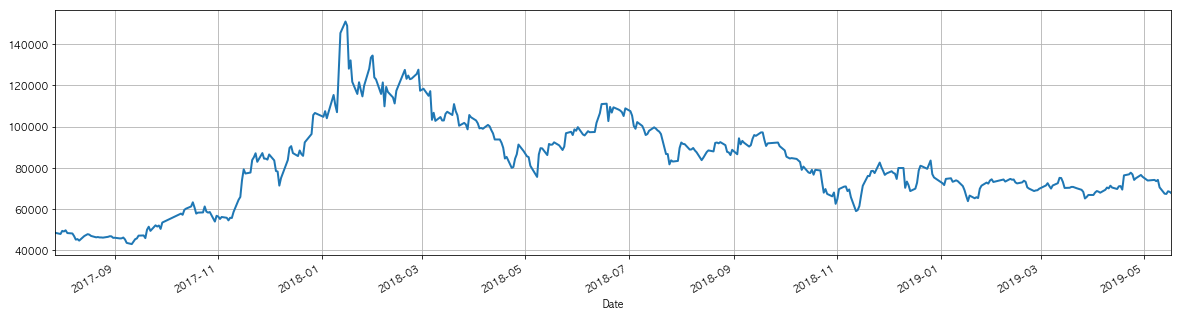

In [50]:
df_1['Close'].plot(figsize=(20,5))

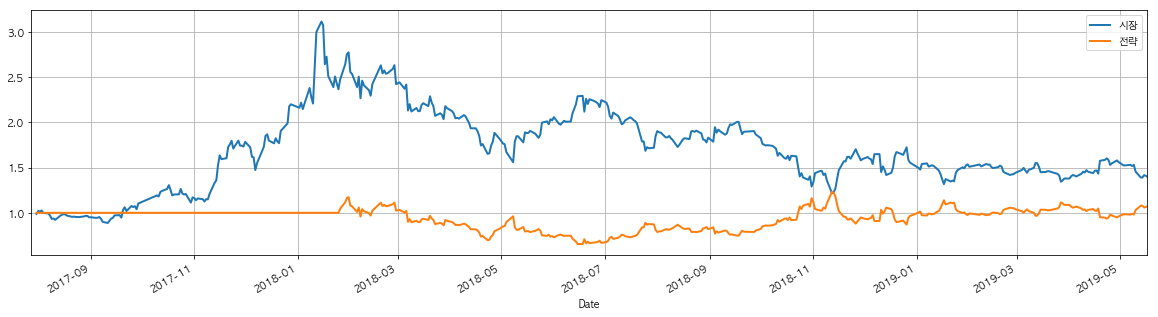

In [51]:
df_1[['시장','전략']].cumsum().apply(np.exp).plot(figsize=(20,5))

## 3.  두 주식의 종가를 비교하기

### 두 개의 주식을 하나의 데이터프레임으로 병합하기

In [52]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,13250,13250,12900,12950,497396,-0.022642
2017-01-03,13000,13150,12700,12750,540369,-0.015444
2017-01-04,12800,12900,12650,12850,399112,0.007843
2017-01-05,12950,13550,12800,13200,1159516,0.027237
2017-01-06,13250,13250,12950,13050,385308,-0.011364


In [53]:
df_2.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-07-28,42015,48417,42015,48417,14075726,NaN
2017-07-31,47935,50534,46347,47888,4965563,-0.010926
2017-08-01,48994,50438,47262,49380,3611026,0.031156
2017-08-02,48898,50246,48127,49091,2495045,-0.005853
2017-08-03,48609,49764,46876,49669,3930618,0.011774


In [54]:
df_3 = pd.merge(df,df_2, left_index=True, right_index=True)

In [55]:
df_3.head()

,Open_x,High_x,Low_x,Close_x,Volume_x,Change_x,Open_y,High_y,Low_y,Close_y,Volume_y,Change_y
Date,,,,,,,,,,,,
2017-07-28,24250,24500,23500,24100,1607694,0.008368,42015,48417,42015,48417,14075726,NaN
2017-07-31,23850,24800,23400,24800,1349443,0.029046,47935,50534,46347,47888,4965563,-0.010926
2017-08-01,24850,26350,24700,25700,3246676,0.036290,48994,50438,47262,49380,3611026,0.031156
2017-08-02,25900,26200,23800,24100,3115525,-0.062257,48898,50246,48127,49091,2495045,-0.005853
2017-08-03,24400,25100,23500,23900,1326922,-0.008299,48609,49764,46876,49669,3930618,0.011774


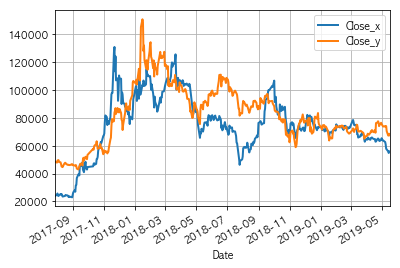

In [56]:
df_3[['Close_x','Close_y']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126591f60>,
      dtype=object)

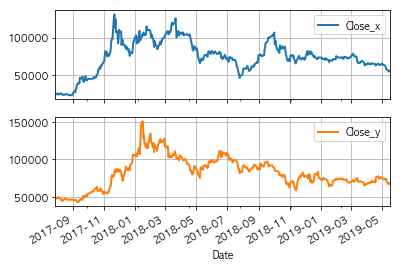

In [57]:
df_3[['Close_x','Close_y']].plot(subplots=True)

# 4. 수익률 확인하기

### 기존 종가를 별도의 변수에 할당

In [58]:
df['Close'].head()

Date
2017-01-02    12950
2017-01-03    12750
2017-01-04    12850
2017-01-05    13200
2017-01-06    13050
Name: Close, dtype: int64

In [59]:
df_close = df['Close'].copy()

### 특정 정보를 추출 하기

        where 메소드를 사용해서 처리하면  전체 원소는 변화가 없지만 조건에 만족하지 않으면 NaN 처리가 됨

#### 십만원보다 큰 값만 식별

In [60]:
df_where = df_close.where(df_close > 100000)

In [61]:
df_where.head()

Date
2017-01-02   NaN
2017-01-03   NaN
2017-01-04   NaN
2017-01-05   NaN
2017-01-06   NaN
Name: Close, dtype: float64

#### 특정 조건에 맞는 값을 처리 

In [62]:
df_where.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2019-05-03', '2019-05-07', '2019-05-08', '2019-05-09',
               '2019-05-10', '2019-05-13', '2019-05-14', '2019-05-15',
               '2019-05-16', '2019-05-17'],
              dtype='datetime64[ns]', name='Date', length=579, freq=None)

In [63]:
df_where.min()

100100.0

In [64]:
df_where.idxmin()

Timestamp('2018-09-20 00:00:00')

In [65]:
df_where.loc[df_where.idxmin()]

100100.0

### 수익률 함수

In [66]:
help(df_close.pct_change)

Help on method pct_change in module pandas.core.generic:

pct_change(periods=1, fill_method='pad', limit=None, freq=None, **kwargs) method of pandas.core.series.Series instance
    Percentage change between the current and a prior element.
    
    Computes the percentage change from the immediately previous row by
    default. This is useful in comparing the percentage of change in a time
    series of elements.
    
    Parameters
    ----------
    periods : int, default 1
        Periods to shift for forming percent change.
    fill_method : str, default 'pad'
        How to handle NAs before computing percent changes.
    limit : int, default None
        The number of consecutive NAs to fill before stopping.
    freq : DateOffset, timedelta, or offset alias string, optional
        Increment to use from time series API (e.g. 'M' or BDay()).
    **kwargs
        Additional keyword arguments are passed into
        `DataFrame.shift` or `Series.shift`.
    
    Returns
    -------
 

In [67]:
df_close.iloc[0]

12950

In [68]:
df_close.iloc[1]

12750

### 수익률 계산하기 

      현재 원소와 직전 원소 간의 변화를 계산한다. 
      
      주식 종가 데이터를 가지고 일별 수익률을 계산해 줌

In [69]:
(df_close.iloc[1] - df_close.iloc[0]) / df_close.iloc[0]

-0.015444015444015444

In [70]:
(df_close.iloc[2] - df_close.iloc[1]) / df_close.iloc[1]

0.00784313725490196

In [71]:
df_close_pct = df_close.pct_change()

#### 첫번째 값은 직전 값이 없으므로 처리기 안됨

In [72]:
df_close_pct.head()

Date
2017-01-02         NaN
2017-01-03   -0.015444
2017-01-04    0.007843
2017-01-05    0.027237
2017-01-06   -0.011364
Name: Close, dtype: float64

### 종가에 대한 분포 확인 

#### 평균과 표준편차 구하기

In [73]:
df_close.mean()

60036.42487046632

In [74]:
df_close.std()

32469.17758283503

#### 종가에 대한 분포 처리하기

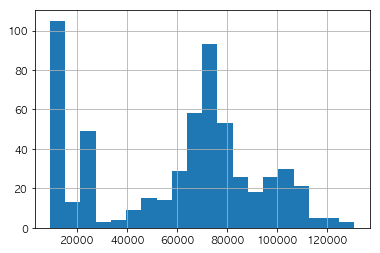

In [75]:
df_close.hist(bins=20)

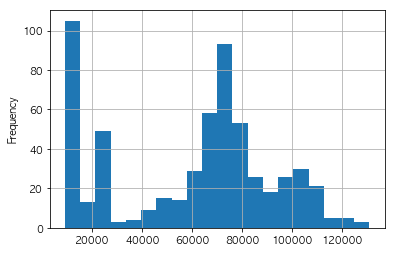

In [76]:
df_close.plot.hist(bins=20)

### 수익률을 계산하면 평균에 맞는 정규분포 법칙가 유사

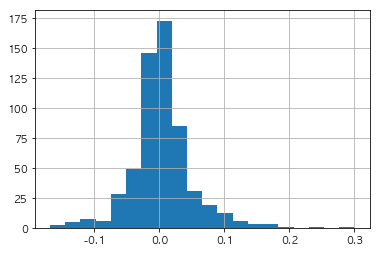

In [77]:
df_close_pct.hist(bins=20)

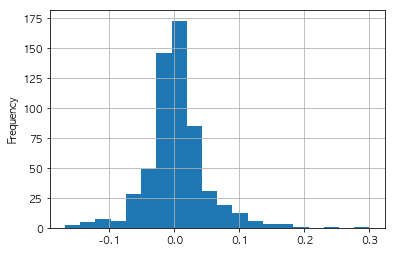

In [78]:
df_close_pct.plot.hist(bins=20)

# 5. 최대 가격 추출해 보기

In [79]:
df.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2017-01-02,13250,13250,12900,12950,497396,-0.022642
2017-01-03,13000,13150,12700,12750,540369,-0.015444
2017-01-04,12800,12900,12650,12850,399112,0.007843
2017-01-05,12950,13550,12800,13200,1159516,0.027237
2017-01-06,13250,13250,12950,13050,385308,-0.011364


In [80]:
df.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64

### 가격정보만 가져오기

In [81]:
df_max = df[df.columns[:4]].copy()

In [82]:
df_max.head()

,Open,High,Low,Close
Date,,,,
2017-01-02,13250,13250,12900,12950
2017-01-03,13000,13150,12700,12750
2017-01-04,12800,12900,12650,12850
2017-01-05,12950,13550,12800,13200
2017-01-06,13250,13250,12950,13050


In [83]:
df_max = df_max.max(axis=1)

#### 최대 가격과 종가를 비교한 경우 

       종가가 최대 가격인 경우는 26번 

In [84]:
df_max.shape

(579,)

In [85]:
(df_max == df.Close).sum()

26

In [86]:
(df.High == df.Close).sum()

26

In [87]:
 (df.Close == df.Open).sum()

21